# Question1

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [150]:
iris = datasets.load_iris()

In [151]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [152]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [153]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [154]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [155]:
Y = iris['target']
dy = pd.DataFrame()
dy['iris'] = Y
dy2 = dy.copy()
dy2 = dy2.replace((0,1,2),(0,0,1))
pd.value_counts(dy2.iris)

0    100
1     50
Name: iris, dtype: int64

In [156]:
type(iris.target)
iris.target.shape

(150,)

In [157]:
target = np.array(iris.target).reshape(-1,1)

In [158]:
data_a1 = pd.DataFrame()
data_a1['sepal_length'] = iris['data'][:,0]
data_a1['sepal_width'] = iris['data'][:,1]
data_a1['petal_length'] = iris['data'][:,2]
data_a1['petal_width'] = iris['data'][:,3]

In [159]:
model_1 = LogisticRegression(solver='lbfgs').fit(data_a1, dy2.iris)

In [160]:
model_1.coef_

array([[-0.39444787, -0.5133412 ,  2.93087523,  2.41709879]])

In [161]:
model_1.intercept_

array([-14.43121671])

In [162]:
# a)

In [163]:
y = iris.target

In [164]:
data_a1 = pd.DataFrame()

In [165]:
data_a1['sepal_length'] = iris['data'][:,0]

In [166]:
data_a1['sepal_width'] = iris['data'][:,1]

In [167]:
data_a1['petal_length'] = iris['data'][:,2]

In [168]:
data_a1['petal_width'] = iris['data'][:,3]

In [169]:
data_a1[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [170]:
data_a1.corr()
target_name = [iris.target_names[0], iris.target_names[1], iris.target_names[2]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A3FEE7278>,
      dtype=object)

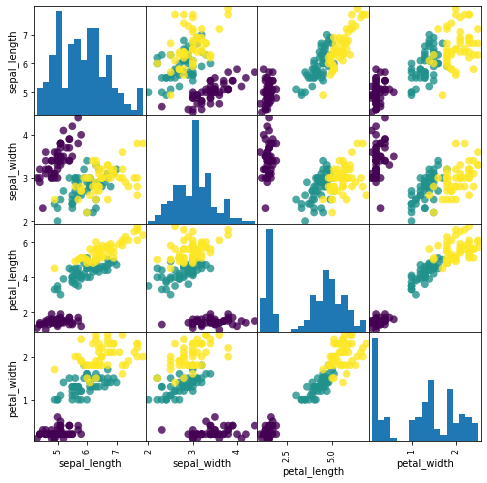

In [171]:
pd.plotting.scatter_matrix(data_a1, c=y, figsize=(8,8), 
                           marker = 'o', hist_kwds = {'bins': 17},
                          s=60, alpha =0.8)

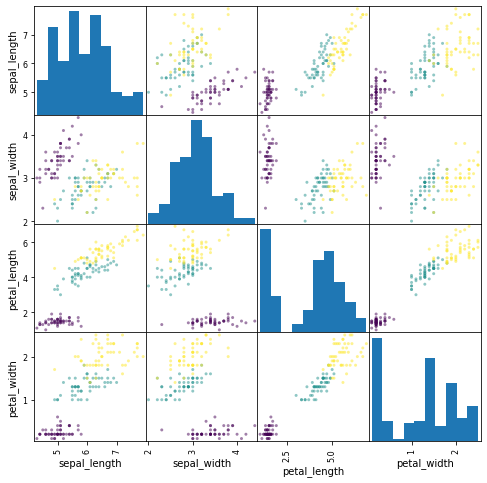

In [271]:
scatter_matrix(data_a1, alpha=0.5, figsize=(8, 8), c=Y)
Y = iris['target']

In [173]:
# b)

In [174]:
cv_method = LeaveOneOut()
model_loocv = LogisticRegression(solver='lbfgs')
x_b1 = iris.data
results_loocv = cross_val_score(model_loocv, x_b1, dy2.iris, cv=cv_method)

In [175]:
results_loocv.mean()

0.9733333333333334

In [176]:
#  the accuracy rate of performing LOOCV cross validation is 0.9733334

In [272]:
# c)

In [178]:
# (i)
kfold1 = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [179]:
i = iris.target.shape

In [180]:
target_new = iris.target.reshape(-1,1)

In [181]:
target_new.shape

(150, 1)

In [182]:
# simple logistic regression

In [183]:
np.random.seed(1)
iris.data.shape

(150, 4)

In [184]:
model_a1 = LogisticRegression(solver='lbfgs')

In [185]:
results_a1 = cross_val_score(model_a1, iris.data, dy2.iris, cv=kfold1)

In [186]:
# accuracy rate

In [187]:
arate1 = results_a1.mean()
arate1

0.9533333333333334

In [188]:
# the accuracy rate for 'True' model is 0.953334

In [189]:
# (ii)
kfold2 = KFold(n_splits = 5, shuffle = False, random_state = 0)

In [190]:
# simple logistic regression

In [191]:
#np.random.seed(1)
#model_a2 = LogisticRegression(solver='lbfgs')
model_a2 = LogisticRegression(solver='lbfgs')
results_a2 = cross_val_score(model_a2, iris.data, dy2.iris, cv=kfold2)

In [192]:
# accuracy rate

In [193]:
arate2 = results_a2.mean()
arate2

0.9266666666666665

In [194]:
# the accuracy rate for 'False' model is 0.926667

# Question2

In [195]:
# a)

In [196]:
flushots = pd.read_csv('flushots.csv')

In [197]:
shot_a2 = flushots.shot.values
flushots.shot[:5]

0    0
1    0
2    1
3    0
4    0
Name: shot, dtype: int64

In [198]:
age_a2 = flushots.age.values

In [199]:
index_a2 = flushots.index_i.values

In [200]:
gender_a2 = flushots.gender.values

In [201]:
# model 1

In [202]:
age_a2 = sm.add_constant(age_a2)

In [203]:
model_a2 = sm.GLM(shot_a2,age_a2,family=sm.families.Binomial()).fit()
model_a2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  159
Model:                            GLM   Df Residuals:                      157
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58.133
Date:                Wed, 09 Oct 2019   Deviance:                       116.27
Time:                        11:08:10   Pearson chi2:                     153.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7433      1.853     -4.718      0.000     -12.375      -5.111
x1             0.1087      0.027      3.973      0.000       0.055       0.162
==============================================================================
"""

In [204]:
model_a2.params

array([-8.74325968,  0.10873664])

In [278]:
# The equation for age to predict shot is:
# shot = 1/(1+e^(8.74326 - 0.10874)*x1)

In [206]:
# model 2

In [207]:
index_a2 = sm.add_constant(index_a2)

In [208]:
model_a2_2 = sm.GLM(shot_a2,index_a2,family=sm.families.Binomial()).fit()
model_a2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  159
Model:                            GLM   Df Residuals:                      157
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -56.598
Date:                Wed, 09 Oct 2019   Deviance:                       113.20
Time:                        11:08:12   Pearson chi2:                     181.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9113      1.627      3.019      0.003       1.723       8.099
x1            -0.1193      0.030     -3.960      0.000      -0.178      -0.060
==============================================================================
"""

In [209]:
model_a2_2.params

array([ 4.91132853, -0.11930928])

In [280]:
# The equation for index to predict shot is:
# shot = 1/(1+e^(-4.911 + 0.199)*x2)

In [211]:
# model 3

In [212]:
gender_a2 = sm.add_constant(gender_a2)

In [213]:
model_a2_3 = sm.GLM(shot_a2,gender_a2,family=sm.families.Binomial()).fit()
model_a2_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  159
Model:                            GLM   Df Residuals:                      157
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66.440
Date:                Wed, 09 Oct 2019   Deviance:                       132.88
Time:                        11:08:13   Pearson chi2:                     159.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0794      0.354     -5.882      0.000      -2.772      -1.386
x1             0.6444      0.456      1.414      0.157      -0.249       1.537
==============================================================================
"""

In [214]:
model_a2_3.params

array([-2.07944154,  0.64435702])

In [279]:
# The equation for index to predict shot is:
# shot =1/(1+e^(2.079 - 0.664)*x3)

In [216]:
# b)

In [217]:
model_1_pred = model_a2.predict([1,55])
model_1_pred

array([0.05937092])

In [218]:
# The prob for model 1 when age is 55 is 0.05937

In [219]:
model_2_pred = model_a2_2.predict([1,60])
model_2_pred

array([0.09558884])

In [220]:
# The prob for model 2 when index is 60 is 0.0955888

In [221]:
model_3_pred = model_a2_3.predict([1,1])
model_3_pred

array([0.19230769])

In [222]:
# The prob for model 3 when gender is male is 0.192308

In [223]:
# c)

In [224]:
# model_a2

In [225]:
model_a2.null_deviance

134.94076227095624

In [226]:
model_a2.deviance

116.26695826327159

In [227]:
# much smaller than null_deviance - good model

In [228]:
# model_a2_2

In [229]:
model_a2_2.null_deviance

134.94076227095624

In [230]:
model_a2_2.deviance

113.19579725936082

In [231]:
# much smaller than null_deviance -good model

In [232]:
# model_a2_3

In [233]:
model_a2_3.null_deviance

134.94076227095624

In [234]:
model_a2_3.deviance

132.88089493174806

In [235]:
# not much smaller than null_deviance -not good model

In [236]:
model_a2.aic

120.26695826327158

In [237]:
model_a2_2.aic

117.19579725936083

In [238]:
model_a2_3.aic

136.88089493174806

In [239]:
# Since the AIC value for model_a2_2 is smallest,
# this model is the best compare to other models.

# error rate

In [240]:
yhat_model1 = model_a2.predict(sm.add_constant(age_a2))

In [241]:
yhat_model1[yhat_model1>0.5] = 1
yhat_model1[yhat_model1<0.5] = 0

In [242]:
df2 = pd.DataFrame()
df2['Success'] = flushots.shot
df2['prediction'] = yhat_model1.astype(int)

In [243]:
m_1 = len(df2)
m_1

159

In [244]:
pd.crosstab(df2.prediction,df2.Success)

Success,0,1
prediction,,
0,132,22
1,3,2


In [245]:
error_rate_1 = 25/159
error_rate_1

0.15723270440251572

In [246]:
yhat_model2 = model_a2_2.predict(sm.add_constant(index_a2))

In [247]:
yhat_model2[yhat_model2>0.5] = 1
yhat_model2[yhat_model2<0.5] = 0

In [248]:
df2_2 = pd.DataFrame()
df2_2['Success'] = flushots.shot
df2_2['prediction'] = yhat_model2.astype(int)

In [249]:
m_2 = len(df2_2)
m_2

159

In [250]:
pd.crosstab(df2_2.prediction,df2_2.Success)

Success,0,1
prediction,,
0,133,21
1,2,3


In [251]:
error_rate_2 = 23/159
error_rate_2

0.14465408805031446

In [252]:
yhat_model3 = model_a2_3.predict(sm.add_constant(gender_a2))

In [253]:
yhat_model3[yhat_model3>0.5] = 1
yhat_model3[yhat_model3<0.5] = 0

In [254]:
df2_3 = pd.DataFrame()
df2_3['Success'] = flushots.shot
df2_3['prediction'] = yhat_model3.astype(int)

In [255]:
m_3 = len(df2_3)
m_3

159

In [256]:
pd.crosstab(df2_3.prediction,df2_3.Success)

Success,0,1
prediction,,
0,135,24


In [257]:
error_rate_3 = 24/159
error_rate_3

0.1509433962264151

In [258]:
# The error rate for model 1 is 0.15723270440251572
# The error rate for model 2 is 0.14465408805031446
# The error rate for model 3 is 0.1509433962264151

In [259]:
# The best predict is model 2 since the error rate is smallest.

In [260]:
# d)

In [261]:
range_low_age = min(flushots.age)-5
range_high_age = max(flushots.age)+5
xaxis = np.arange(range_low_age,range_high_age,1)
yaxis = model_a2.predict(sm.add_constant(xaxis))

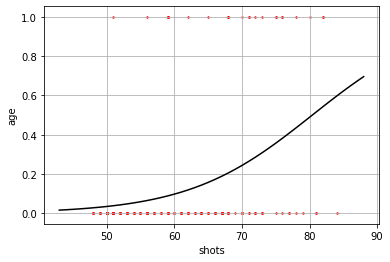

In [262]:
plt.plot(xaxis,yaxis,c='k')
plt.scatter(flushots.age,flushots.shot,s=2,c='r')
plt.xlabel('shots')
plt.ylabel('age')
plt.grid()

In [285]:
range_low_age = min(flushots.index_i)-5
range_high_age = max(flushots.index_i)+5
xaxis_2 = np.arange(range_low_age,range_high_age,1)
yaxis_2 = model_a2_2.predict(sm.add_constant(xaxis_2))

In [286]:
flushots.index_i[:5]

0    52
1    55
2    51
3    70
4    70
Name: index_i, dtype: int64

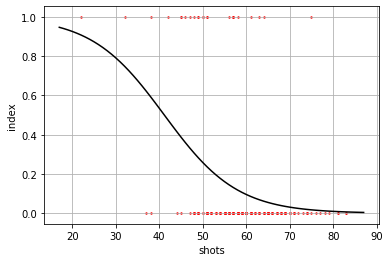

In [287]:
plt.plot(xaxis_2,yaxis_2,c='k')
plt.scatter(flushots.index_i,flushots.shot,s=2,c='r')
plt.xlabel('shots')
plt.ylabel('index')
plt.grid()

# Question3

In [265]:
# a)

In [266]:
# f = 1/(1+e^(25 - 0.2x))

In [267]:
# b)

In [268]:
# set the equation equal to 0.5 = 1/(1+e^(25 - 0.2x))
# solve the x for the result
# x = 125

In [269]:
# c)

In [270]:
# For the ratio of odds for when X = 160 to X = 150
# set the equation equal to p/(1-p) = e^(-25 + 0.2*160) = e^7
# set the second equation equal to p(1-p) = e^(-25 + 0.2*150) = e^5
# The ratio should be e^7/e^5 = e^2
# Or the ration should be e^5/e^7 = e^-2 if consider When X = 150 to X = 160